### === Task ===

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

3. Plot training losses as number of iters increases.

4. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

In [14]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

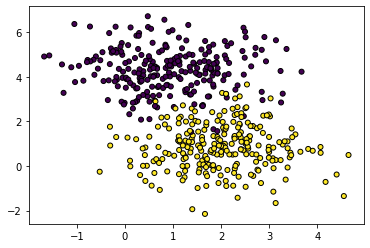

In [15]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

In [25]:
class LogisticRegression:
    def __init__(self, max_iter=1000, alpha = 0.01):
        self.max_iter = max_iter
        self.alpha = alpha
        self.max_iter = max_iter
        

    def mini_batch_GD(self,X, y):
        self.w = np.zeros(X.shape[1])
        cost_list = []
        batch_size = int(0.1 * X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0]) #<----with replacement
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]
            cost, grad = self.gradient(batch_X, batch_y, self.w)
            if i % 500 == 0:
                print(f"Cost at iteration {i}", cost)
                cost_list.append(cost)
            self.w = self.w - self.alpha * grad
        return self.w, i,cost_list

    def gradient(self,X, y, w):
        m = X.shape[0]
        h = self.h_theta(X, w)
        error = h - y
        # putting negative sign for negative log likelihood
        cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def h_theta(self,X, w):
        return self.sigmoid(X @ self.w)

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat

In [26]:
model = LogisticRegression(max_iter=20000)
w, i,cost_list = model.mini_batch_GD(X_train, y_train)
yhat = model.predict(X_test)

Cost at iteration 0 24.26015131959808
Cost at iteration 500 3.556131107224281
Cost at iteration 1000 3.9773401909515282
Cost at iteration 1500 3.6629373521761606
Cost at iteration 2000 1.2702834639409457
Cost at iteration 2500 4.121416213910922
Cost at iteration 3000 5.991872261654966
Cost at iteration 3500 1.1730937323743449
Cost at iteration 4000 5.3070787656092895
Cost at iteration 4500 1.2530516348438403
Cost at iteration 5000 3.581595123905044
Cost at iteration 5500 5.2468581334930136
Cost at iteration 6000 0.9296350629551078
Cost at iteration 6500 0.0017823130384701973
Cost at iteration 7000 4.527274683246945
Cost at iteration 7500 7.209251501570873
Cost at iteration 8000 6.770687801948053
Cost at iteration 8500 1.1764058982814025
Cost at iteration 9000 2.2071640554151557
Cost at iteration 9500 5.460813420308676
Cost at iteration 10000 3.5472701268915494
Cost at iteration 10500 1.7487608708858935
Cost at iteration 11000 6.689478218858992
Cost at iteration 11500 0.9075318089048
Co

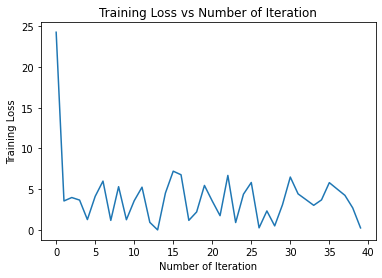

In [27]:
plt.title("Training Loss vs Number of Iteration")
plt.xlabel("Number of Iteration")
plt.ylabel("Training Loss")
plt.plot(cost_list)


In [28]:
class classification_reports():
    
    def __init__(self, actual, predicted):
        self.actual = actual
        self.predicted = predicted
        
        self.TP = sum((self.actual == 1) & (self.predicted == 1))
        self.TN = sum((self.actual == 0) & (self.predicted == 0))
        self.FN = sum((self.actual == 1) & (self.predicted == 0))
        self.FP = sum((self.actual == 0) & (self.predicted == 1))
        
    def accuracy(self):
        self.acc = 100 * (self.TP + self.TN)/ float( self.TP + self.TN + self.FN + self.FP)
        return self.acc
    
    def recall(self):
        self.recall = (100* self.TP)/ float(self.TP + self.FN)
        return self.recall
        
    def precision(self):
        self.precision = 100* (self.TP)/ float(self.TP + self.FP)
        return self.precision
        
    def f1(self):
        self.f1 = 2 * self.precision * self.recall / (self.precision + self.recall)
        return self.f1


In [29]:
report = classification_reports(y_test, yhat)
print(f"Accuracy: {report.accuracy()}")
print(f"Recall: {report.recall()}")
print(f"Precision: {report.precision()}")
print(f"F1: {report.f1()}")

Accuracy: 96.66666666666667
Recall: 93.82716049382717
Precision: 100.0
F1: 96.81528662420382


In [31]:
from sklearn.metrics import classification_report
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        74
         1.0       0.94      1.00      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

